In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from prettytable import PrettyTable
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
import time
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
# path of the file
filepath = "D:\CYBER ATTACK DETECTION PROJECT\DATASET\\Final Dataset for comparision.csv"

In [3]:
# loading the dataset 
df = pd.read_csv(filepath, nrows=10000000)

In [4]:
df.head()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,misses_bytes,conn_state_encoded,proto_encoded
0,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,-1.0,6,1
1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,-1.0,6,1
2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,-1.0,6,1
3,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,Benign,-1.0,6,1
4,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,-1.0,6,1


In [5]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   duration            float64
 1   orig_bytes          int64  
 2   resp_bytes          int64  
 3   missed_bytes        float64
 4   orig_pkts           float64
 5   orig_ip_bytes       float64
 6   resp_pkts           float64
 7   resp_ip_bytes       float64
 8   label               object 
 9   misses_bytes        float64
 10  conn_state_encoded  int64  
 11  proto_encoded       int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 915.5+ MB


In [6]:
# statistical measure on dataset

df.describe()

,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,misses_bytes,conn_state_encoded,proto_encoded
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,-8.437321e-02,1.824957e+02,2.934570e+00,2.150090e-02,2.002007e+00,2.761713e+02,3.416330e-02,5.571225e+00,-9.927626e-01,5.986300e+00,1.039763e+00
std,4.382422e+01,5.522816e+05,3.698325e+03,1.535074e+01,4.128157e+02,5.638333e+05,6.231040e+00,3.860911e+03,4.932938e+00,4.438511e-01,2.056215e-01
min,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00
25%,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,1.000000e+00,4.000000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,6.000000e+00,1.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,6.000000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,6.000000e+00,1.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,8.000000e+01,0.000000e+00,0.000000e+00,-1.000000e+00,6.000000e+00,1.000000e+00
max,9.328003e+04,1.744830e+09,1.166102e+07,2.027200e+04,1.305034e+06,1.781371e+09,9.307000e+03,1.207699e+07,5.792000e+03,1.200000e+01,2.000000e+00


In [7]:
df.shape

(10000000, 12)

In [8]:
df.columns

Index(['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts',
       'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'misses_bytes',
       'conn_state_encoded', 'proto_encoded'],
      dtype='object')

In [9]:
df['label'].value_counts()

label
PartOfAHorizontalPortScan     6273278
Benign                        1818231
Okiru                         1628670
DDoS                           264133
C&C                              7298
Attack                           6943
C&C-HeartBeat                    1345
C&C-FileDownload                   46
C&C-Torii                          30
FileDownload                       14
C&C-HeartBeat-FileDownload          8
Okiru-Attack                        3
C&C-Mirai                           1
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

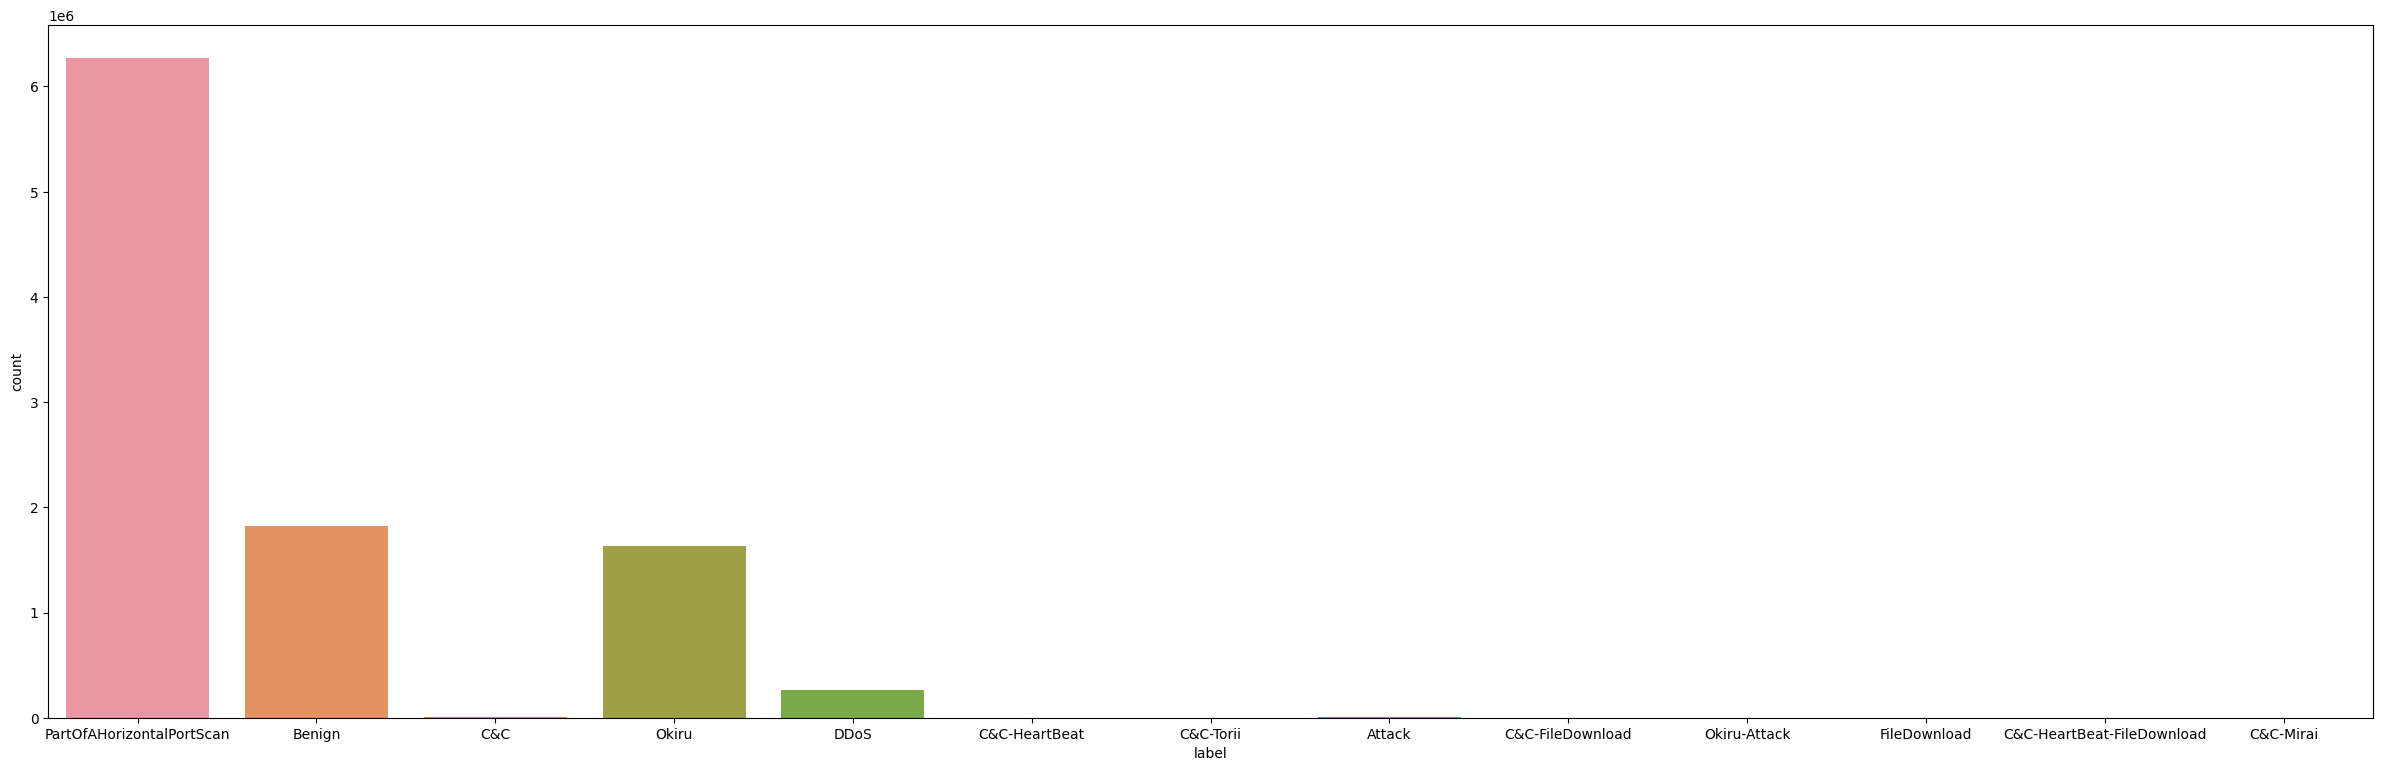

In [10]:
plt.figure(figsize= (30,9))
sns.countplot(x = df['label'])

In [11]:
df['label'] = df['label'].replace(['PartOfAHorizontalPortScan','Okiru','Okiru-Attack','DDoS','C&C','Attack','C&C-HeartBeat','C&C-FileDownload','C&C-Torii','FileDownload','C&C-HeartBeat-FileDownload','C&C-Mirai'], 'Attack')
df['label'] = df['label'].replace(['Benign'],'Normal')
df['label'].value_counts()

label
Attack    8181769
Normal    1818231
Name: count, dtype: int64

In [12]:
# Creating a instance of label Encoder

from sklearn.calibration import LabelEncoder


le = LabelEncoder()


label = le.fit_transform(df['label'])

label

In [13]:
df.drop("label", axis=1, inplace=True)

df["label"] = label



In [14]:
df.columns = ['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'misses_bytes','proto_encoded', 'conn_state_encoded']

In [15]:
for col in df.columns:
    print(col)

duration
orig_bytes
resp_bytes
missed_bytes
orig_pkts
orig_ip_bytes
resp_pkts
resp_ip_bytes
label
misses_bytes
proto_encoded
conn_state_encoded


In [16]:
print(df.columns.tolist())

['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'label', 'misses_bytes', 'proto_encoded', 'conn_state_encoded']


In [17]:
df['label'].value_counts()

label
Attack    8181769
Normal    1818231
Name: count, dtype: int64

In [18]:
df['label'].head()

0    Attack
1    Attack
2    Attack
3    Normal
4    Normal
Name: label, dtype: object

## Splitting the dataset into features and target

In [19]:
# features
X = df[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes',   'misses_bytes', 'proto_encoded', 'conn_state_encoded']]

# target
Y = df['label']

In [20]:
# shape of features and target

print("Shape of features : ",X.shape)
print("Shape of target : ",Y.shape)

Shape of features :  (10000000, 11)
Shape of target :  (10000000,)


In [21]:
# Split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [22]:
df['label'].value_counts()

label
Attack    8181769
Normal    1818231
Name: count, dtype: int64

In [23]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
scaler

StandardScaler()

In [24]:
# start = time.time()
# rf = RandomForestClassifier()

# # Fit the Random Forest model on the training data
# rf.fit(X_train, Y_train)

# # Make predictions on the test data
# rf_pred = rf.predict(X_test)

# # Calculate the accuracy, F1 score, recall, and precision of the Random Forest model
# rf_acc = accuracy_score(Y_test, rf_pred)
# rf_f1 = f1_score(Y_test, rf_pred, average='macro', zero_division=1)
# rf_recall = recall_score(Y_test, rf_pred, average='macro', zero_division=1)
# rf_precision = precision_score(Y_test, rf_pred, average='macro', zero_division=1)
# end = time.time()

# rf_time = end - start

In [25]:
# print('Random Forest Accuracy : ',rf_acc)
# print('Random Forest F1 Score : ',rf_f1)
# print('Random Forest Recall : ',rf_recall)
# print('Random Forest Precision : ',rf_precision)
# print('Random Forest Time : ',rf_time)

In [26]:
start = time.time()
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

dt_pred = dt.predict(X_test)


# Evaluate Decision Tree performance
dt_acc = accuracy_score(Y_test, dt_pred)
dt_f1 = f1_score(Y_test, dt_pred,average='macro',  zero_division=1)
dt_recall = recall_score(Y_test, dt_pred,average='macro',  zero_division=1)
dt_precision = precision_score(Y_test, dt_pred,average='macro', zero_division=1)
end = time.time()

dt_time = end - start

In [27]:
print('Decision Tree Accuracy : ',dt_acc)
print('Decision Tree F1 Score : ',dt_f1)
print('Decision Tree Recall : ',dt_recall)
print('Decision Tree Precision : ',dt_precision)
print('Decision Tree Time : ',dt_time)

In [28]:

start = time.time()


gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, Y_train)

xg_pred = gb_model.predict(X_test)

xg_acc = accuracy_score(Y_test, xg_pred)
xg_precision = precision_score(Y_test, xg_pred, pos_label='Attack')
xg_recall = recall_score(Y_test, xg_pred, pos_label='Attack')
xg_f1 = f1_score(Y_test, xg_pred, pos_label='Attack')
end = time.time()

xg_time = end - start

In [30]:
print('Gradient Boosting  Accuracy : ',xg_acc)
print('Gradient Boosting  F1 Score : ',xg_f1)
print('Gradient Boosting  Recall : ',xg_recall)
print('Gradient Boosting  Precision : ',xg_precision)
print('Gradient Boosting  Time : ',xg_time)

In [34]:
start = time.time()

lg = LogisticRegression(max_iter=10000, solver='liblinear', tol=1e-5)
lg.fit(X_train, Y_train)

lg_pred = lg.predict(X_test)

lg_acc = accuracy_score(Y_test, lg_pred)
lg_f1 = f1_score(Y_test, lg_pred, average='macro', zero_division=1)
lg_recall = recall_score(Y_test, lg_pred, average='macro', zero_division=1)
lg_precision = precision_score(Y_test, lg_pred, average='macro', zero_division=1)

end = time.time()

lg_time = end - start

In [ ]:
print('Logistic Regression Accuracy : ',lg_acc)
print('Logistic Regression F1 Score : ',lg_f1)
print('Logistic Regression Recall : ',lg_recall)
print('Logistic Regression Precision : ',lg_precision)
print('Logistic Regression Time : ',lg_time)

Logistic Regression Accuracy :  0.8180313333333333
Logistic Regression F1 Score :  0.45013031754811483
Logistic Regression Recall :  0.5000865879088663
Logistic Regression Precision :  0.8580882985861564
Logistic Regression Time :  2363.6505813598633


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming lg_pred contains the predicted labels from logistic regression
# and Y_test contains the true labels of the test data

# Create confusion matrix
cm = confusion_matrix(Y_test, lg_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[2373146   80862]
 [ 269176  276816]]


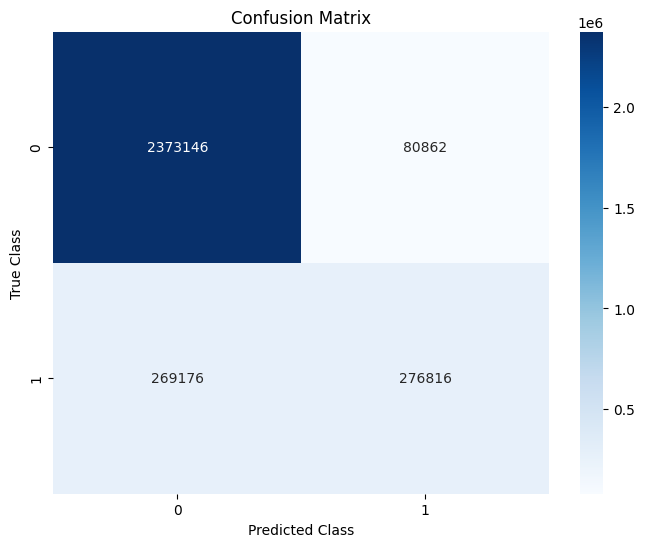

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(Y_test, lg_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

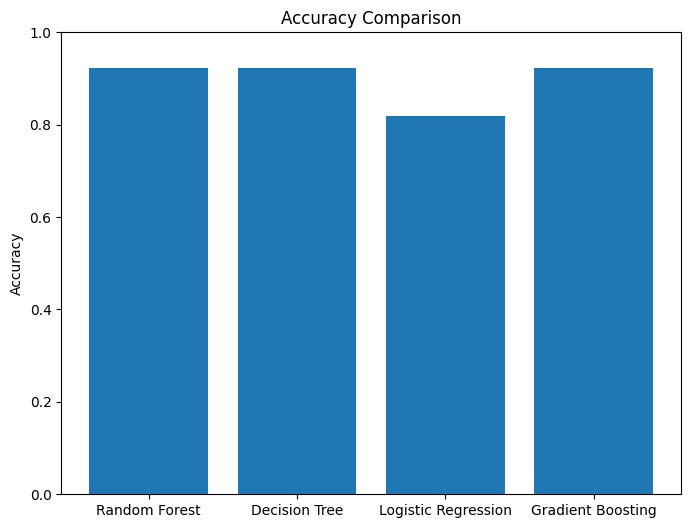

In [ ]:

fig = plt.subplots(figsize=(8, 6))
labels = ['Random Forest','Decision Tree','Logistic Regression', 'Gradient Boosting']
accuracies = [rf_acc,dt_acc,lg_acc,xg_acc]
plt.bar(labels, accuracies)
plt.ylim([0, 1])
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')
plt.show()

## Creating comparision table

In [ ]:
# create table
table = PrettyTable()
table.field_names = ["Algorithm", "Accuracy", "F1 Score", "Recall", "Precision", "Time"]
# table.add_row(["SVM", svm_acc, svm_f1, svm_recall, svm_precision])
table.add_row(["Random Forest", rf_acc, rf_f1, rf_recall, rf_precision, rf_time])
table.add_row(["Decision Tree", dt_acc, dt_f1, dt_recall, dt_precision, dt_time])
table.add_row(["Gradient Boosting", xg_acc, xg_f1, xg_recall, xg_precision, xg_time])
table.add_row(["Logistic Regression", lg_acc, lg_f1, lg_recall, lg_precision, lg_time])

# print table
print(table)

+---------------------+-----------+---------------------+--------------------+--------------------+--------------------+
|      Algorithm      |  Accuracy |       F1 Score      |       Recall       |     Precision      |        Time        |
+---------------------+-----------+---------------------+--------------------+--------------------+--------------------+
|    Random Forest    | 0.9229185 |  0.8724275533166452 | 0.8783483538863561 | 0.8668431132064265 | 405.37333965301514 |
|    Decision Tree    |  0.922914 |  0.8724202385032136 | 0.8783413238033058 | 0.8668355534148163 | 55.09011197090149  |
| Logistic Regression |  0.818319 | 0.45037911194816016 | 0.5001669098593685 | 0.8650386755711152 | 81.94005799293518  |
|  Gradient Boosting  |  0.922826 |  0.9526386461381355 | 0.9485324400590031 | 0.9567805584011025 | 433.7537450790405  |
+---------------------+-----------+---------------------+--------------------+--------------------+--------------------+


## Creating comparision plot graph

In [ ]:
# Create comparison graph
algorithms = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'Gradient Boosting']
accuracy_scores = [rf_acc, dt_acc, lg_acc, xg_acc]
f1_scores = [rf_f1, dt_f1, lg_f1, xg_f1]
recall_scores = [rf_recall, dt_recall, lg_recall, xg_recall]
precision_scores = [rf_precision, dt_precision, lg_precision, xg_precision]
time_cost = [rf_time,dt_time, lg_time, xg_time]

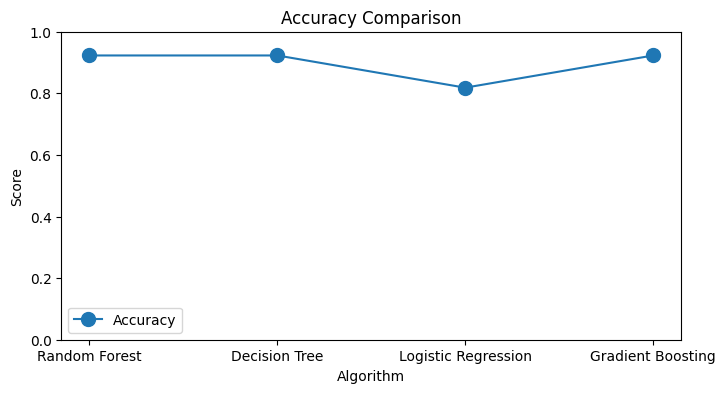

In [ ]:
# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 4))

# Plot the data
ax.plot(algorithms, accuracy_scores, marker='o', label='Accuracy', ms = 10)
plt.ylim([0, 1])
# Add labels and title
ax.set_title('Accuracy Comparison')
ax.set_xlabel('Algorithm')
ax.set_ylabel('Score')
ax.legend()

# Show the plot
plt.show()

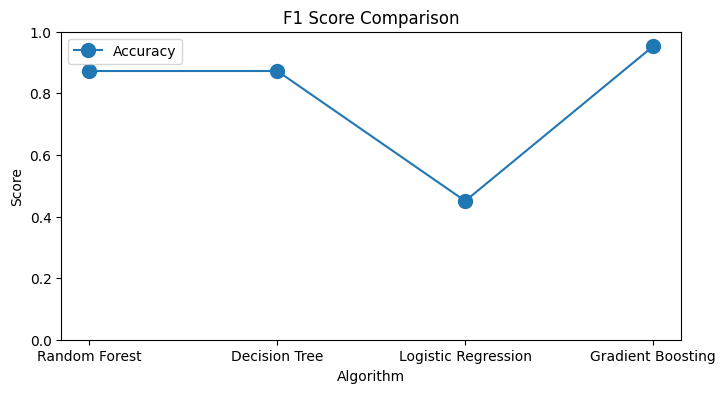

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(algorithms, f1_scores, marker='o', label='Accuracy', ms = 10)
plt.ylim([0, 1])
plt.title('F1 Score Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend()
plt.show()

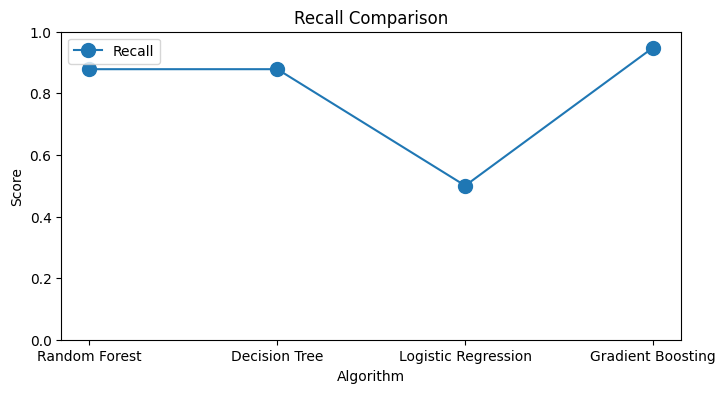

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(algorithms, recall_scores, marker='o', label='Recall', ms = 10)
plt.ylim([0, 1])
plt.title('Recall Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend()
plt.show()

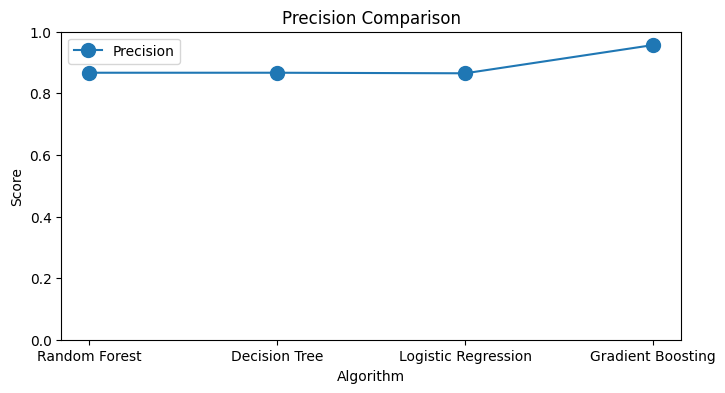

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(algorithms, precision_scores, marker='o', label='Precision', ms = 10)
plt.ylim([0, 1])
plt.title('Precision Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend()
plt.show()

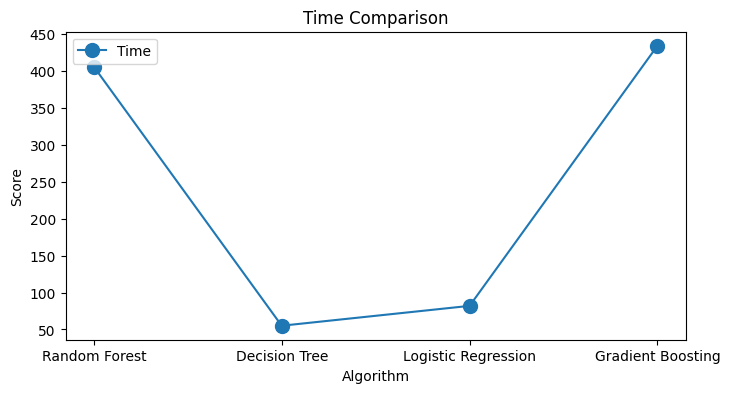

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
plt.plot(algorithms, time_cost, marker='o', label='Time', ms = 10)
plt.title('Time Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend()
plt.show()

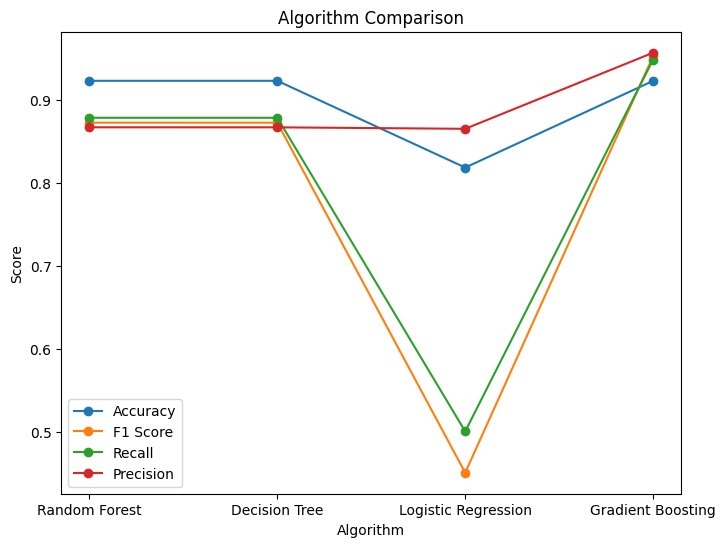

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(algorithms, accuracy_scores, marker='o', label='Accuracy')
plt.plot(algorithms, f1_scores, marker='o', label='F1 Score')
plt.plot(algorithms, recall_scores, marker='o', label='Recall')
plt.plot(algorithms, precision_scores, marker='o', label='Precision')
plt.title('Algorithm Comparison')
plt.xlabel('Algorithm')
plt.ylabel('Score')
plt.legend()
plt.show()

## Creating comparision bar graph

In [ ]:
# models = ['Random Forest', 'Decision Tree', 'Logistic Regression']
# accuracy = [rf_acc,  dt_acc, lg_acc]
# f1 = [rf_f1, dt_f1, lg_f1]
# recall = [rf_recall, dt_recall, lg_recall]
# precision = [rf_precision, dt_precision, lg_precision]

In [ ]:
# x = np.arange(len(models))
# width = 0.15

In [ ]:
# my_list = [accuracy, f1, recall, precision]
# my_array = np.array(my_list)

# print(my_array.shape)

In [ ]:
# fig, ax = plt.subplots(figsize=(14, 8))
# rects1 = ax.bar(x - 1.5*width, accuracy, width, label='Accuracy')
# rects2 = ax.bar(x - 0.5*width, f1, width, label='F1 Score')
# rects3 = ax.bar(x + 0.5*width, recall, width, label='Recall')
# rects4 = ax.bar(x + 1.5*width, precision, width, label='Precision')

# ax.set_ylabel('Score')
# ax.set_xticks(x)
# ax.set_xticklabels(models)
# ax.legend()

# plt.show()

## Classification Report

In [ ]:
print('Decision Tree Classifier:')
print(classification_report(Y_test, dt_pred, zero_division=1))

Decision Tree Classifier:
              precision    recall  f1-score   support

      Attack       0.96      0.95      0.95   1636526
      Normal       0.78      0.81      0.79    363474

    accuracy                           0.92   2000000
   macro avg       0.87      0.88      0.87   2000000
weighted avg       0.92      0.92      0.92   2000000



In [ ]:
print('Random Forest Classifier:')
print(classification_report(Y_test, rf_pred, zero_division=1))

Random Forest Classifier:
              precision    recall  f1-score   support

      Attack       0.96      0.95      0.95   1636526
      Normal       0.78      0.81      0.79    363474

    accuracy                           0.92   2000000
   macro avg       0.87      0.88      0.87   2000000
weighted avg       0.92      0.92      0.92   2000000



In [ ]:
print('Gradient Boosting Classifier:')
print(classification_report(Y_test, xg_pred, zero_division=1))

Gradient Boosting Classifier:
              precision    recall  f1-score   support

      Attack       0.96      0.95      0.95   1636526
      Normal       0.78      0.81      0.79    363474

    accuracy                           0.92   2000000
   macro avg       0.87      0.88      0.87   2000000
weighted avg       0.92      0.92      0.92   2000000



## Making Y_train and dt_pred same number of sample

In [ ]:
print(Y_train.shape)
print(rf_pred.shape)

(8000000,)
(2000000,)


In [ ]:
print(Y_train.shape)
print(dt_pred.shape)

(8000000,)
(2000000,)


In [ ]:
# print(Y_train.shape)
# print(ny_pred.shape)

In [ ]:
# print(Y_train.shape)
# print(rf_pred.shape)

In [ ]:
# print(Y_train.shape)
# print(dt_pred.shape)

In [ ]:
# print(Y_train.shape)
# print(ny_pred.shape)

##                                                              Confusion Matrix

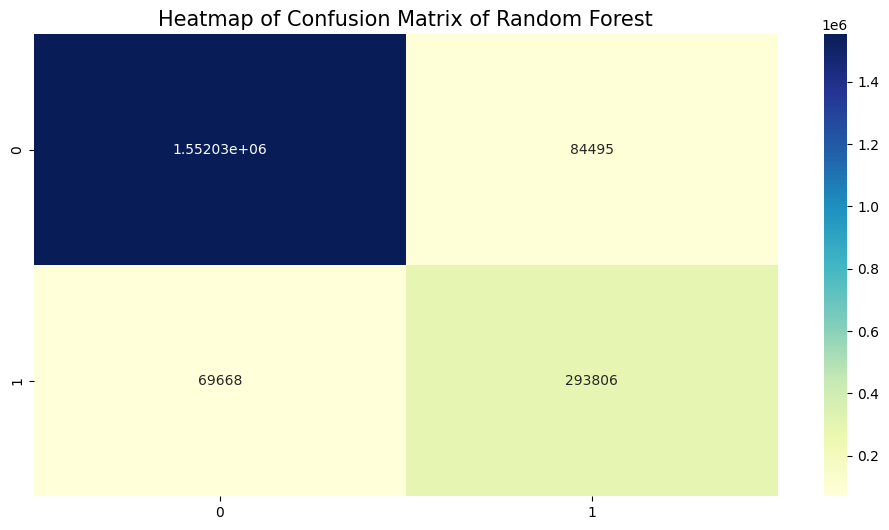

In [ ]:
plt.figure(figsize = (12,6))
cm = confusion_matrix(Y_test, rf_pred)
plt.title("Heatmap of Confusion Matrix of Random Forest", fontsize = 15)
sns.heatmap(cm, annot = True, cmap='YlGnBu', fmt='g')
plt.show()

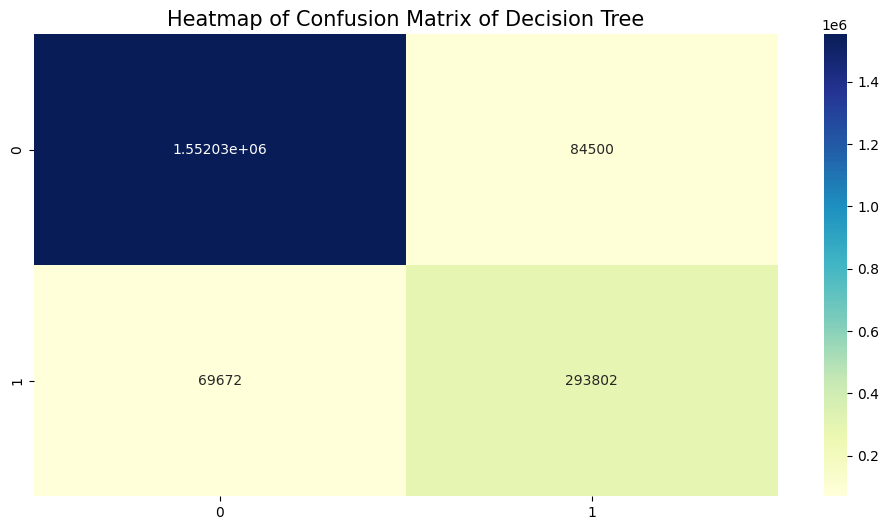

In [ ]:
plt.figure(figsize = (12,6))
cm = confusion_matrix(Y_test, dt_pred)
plt.title("Heatmap of Confusion Matrix of Decision Tree", fontsize = 15)
sns.heatmap(cm, annot = True, cmap='YlGnBu', fmt='g')
plt.show()

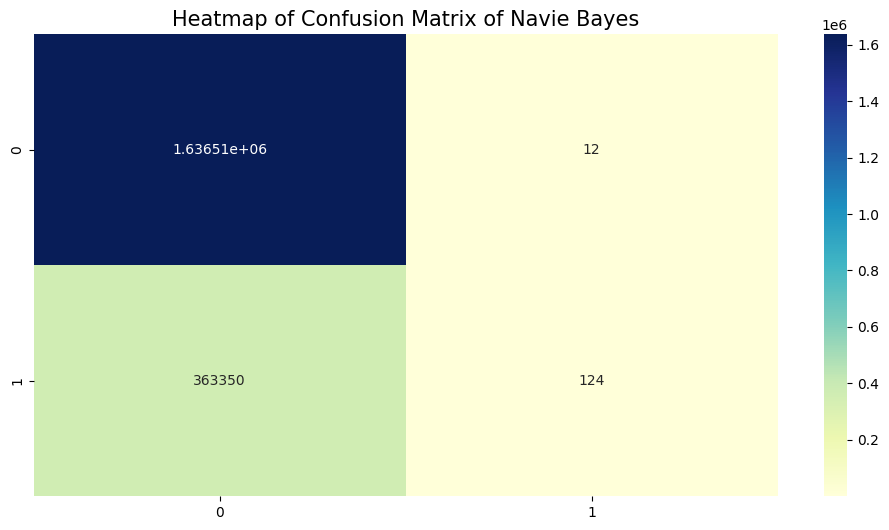

In [ ]:
plt.figure(figsize = (12,6))
cm = confusion_matrix(Y_test, lg_pred)
plt.title("Heatmap of Confusion Matrix of Navie Bayes", fontsize = 15)
sns.heatmap(cm, annot = True, cmap='YlGnBu', fmt='g')
plt.show()